In [14]:
import time
print(time.ctime())
%load_ext ipydex.displaytools

Sun Feb  6 23:41:57 2022


In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
fname = "researchfield_ordered_by_paper.csv"

In [30]:
data = pd.read_csv(f"data/{fname}") ##:
idx = np.flatnonzero(data["fieldLabel"] == "Control Theory")[0]
paper_count = (data["paperCount"]).to_numpy() ##:

,field,fieldLabel,paperCount
0,http://orkg.org/orkg/resource/R11,Science,2891
1,http://orkg.org/orkg/resource/R50,Motor Control,966
2,http://orkg.org/orkg/resource/R278,Information Science,306
3,http://orkg.org/orkg/resource/R133,Artificial Intelligence,301
4,http://orkg.org/orkg/resource/R69,Toxicology,295
...,...,...,...
222,http://orkg.org/orkg/resource/R167,Oceanography and Atmospheric Sciences and Mete...,1
223,http://orkg.org/orkg/resource/R136113,Education Systems and Educational Institutions,1
224,http://orkg.org/orkg/resource/R18,Structural Biology,1
225,http://orkg.org/orkg/resource/R224,Civil and Environmental Engineering,1


---

paper_count := 
array([2891,  966,  306,  301,  295,  238,  203,  161,  108,  100,   96,
         95,   89,   89,   83,   69,   67,   64,   63,   56,   53,   53,
         52,   51,   50,   48,   45,   45,   41,   37,   33,   30,   28,
         27,   27,   27,   26,   25,   23,   23,   21,   20,   18,   18,
         17,   17,   16,   16,   15,   15,   15,   15,   14,   14,   13,
         13,   13,   11,   11,   11,   11,   11,   10,   10,   10,   10,
          9,    9,    9,    9,    8,    8,    8,    8,    8,    8,    8,
          7,    7,    7,    7,    7,    7,    7,    7,    7,    6,    6,
          5,    5,    5,    5,    5,    5,    5,    5,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2

---

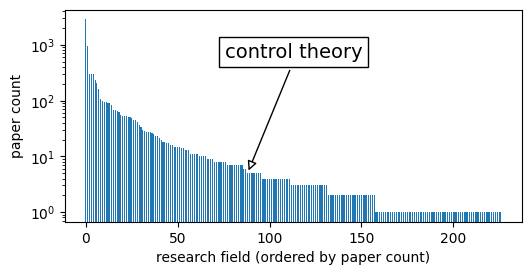

In [61]:
mm = 1/25.4 # mm to inch
scale = 2
fs = [75*mm*scale, 35*mm*scale]
plt.figure(figsize=fs, dpi=100)
n_fields = len(paper_count)
plt.bar(np.arange(n_fields), paper_count, width=0.6)
ax = plt.gca()
ax.set_yscale('log')
plt.ylabel("paper count")
plt.xlabel("research field (ordered by paper count)")


ann = ax.annotate("control theory",
                  xy=(idx, 5), xycoords='data',
                  xytext=(0.5, 0.8), textcoords='axes fraction',
                  size=14, va="center", ha="center",
                  bbox=dict(boxstyle="Square", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.0",
                                  relpos=(0.5, 0.),
                                  fc="w"),
                  )



plt.savefig(f"{fname[:-4]}-hist.pdf", bbox_inches="tight")
plt.show()

## Research problem distribution

In [71]:
fname = "researchproblem_ordered_by_paper.csv"
data = pd.read_csv(f"data/{fname}")
paper_count = (data["paperCount"]).to_numpy() 

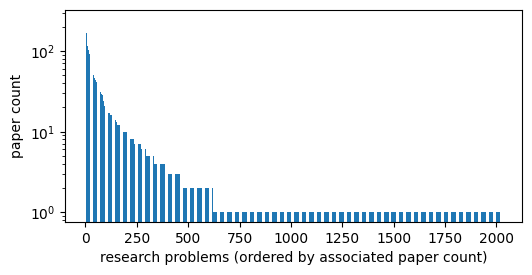

In [72]:
plt.figure(figsize=fs, dpi=100)
n_fields = len(paper_count)
plt.bar(np.arange(n_fields), paper_count, width=0.6)
ax = plt.gca()
ax.set_yscale('log')
plt.ylabel("paper count")
plt.xlabel("research problems (ordered by associated paper count)")


plt.savefig(f"{fname[:-4]}-hist.pdf", bbox_inches="tight")
plt.show()

In [73]:
np.count_nonzero(paper_count <2)/len(paper_count)

0.694320987654321

## property_usage_ordered_by_paper

In [92]:
fname = "property_usage_ordered_by_paper.csv"
data = pd.read_csv(f"data/{fname}")
paper_count = (data["paperCount"]).to_numpy() 

paper_percentage = paper_count/np.max(paper_count) *100
med = np.median(paper_percentage)

# paper_percentage = paper_percentage[np.r_[np.arange(20), -1]]

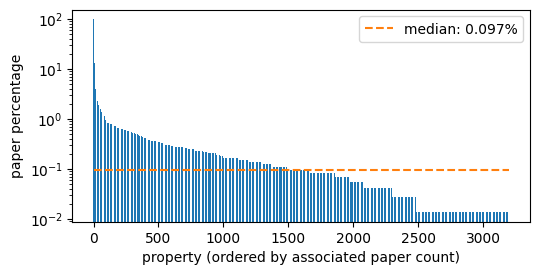

In [97]:
plt.figure(figsize=fs, dpi=100)
n_fields = len(paper_percentage)
plt.bar([0], [100], width=5) # ensure that the first bar is visible
plt.bar(np.arange(n_fields), paper_percentage, width=0.6, color="#1f77b4")

plt.plot([0, n_fields], [med, med], "--", label=f"median: {med:04.3f}%", color="#ff7f0e")
plt.legend(loc="upper right")

ax = plt.gca()
ax.set_yscale('log')
plt.ylabel("paper percentage")
plt.xlabel("property (ordered by associated paper count)")


plt.savefig(f"{fname[:-4]}-hist.pdf", bbox_inches="tight")
plt.show()